In [55]:
library(tidyverse)
library(tidymodels)
library(dplyr)
library(cowplot)
library(ggplot2)
library(broom)

In [84]:
data <- read.csv("listings.csv", header = TRUE) %>%
    select(-id, -name, -host_id, -host_name, -host_since, -neighbourhood_cleansed, -property_type, -license)
data <- na.omit(data)
data["beds_per_accomodate"] = round(data$accommodates / data$beds, 2)
data <- data %>%
    select(-beds, -accommodates)
data <- data %>%
    filter(host_response_time != 'N/A')

data <- data %>%
    mutate(host_response_time = as.factor(host_response_time) ,
           host_response_rate = as.numeric(host_response_rate), 
           host_is_superhost = as.factor(host_is_superhost), 
           neighbourhood_group_cleansed = as.factor(neighbourhood_group_cleansed), 
           room_type = as.factor(room_type),
           instant_bookable = as.factor(instant_bookable))

head(data)

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,bathrooms,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,beds_per_accomodate
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>
1,a few days or more,0.2,f,Other Cities,34.10933,-118.0731,Private room,1.0,1,49,1,364,1,3.00,f,2.00
2,within an hour,1.0,t,Other Cities,34.01559,-118.4941,Entire home/apt,1.0,0,231,5,193,44,4.93,t,2.00
3,within a few hours,1.0,f,City of Los Angeles,33.99017,-118.4225,Entire home/apt,1.0,2,110,30,117,368,4.61,f,1.40
4,within an hour,1.0,t,City of Los Angeles,33.98258,-118.4643,Entire home/apt,3.5,4,1179,2,356,35,4.97,f,1.50
5,within an hour,1.0,t,City of Los Angeles,34.08817,-118.3655,Entire home/apt,4.5,4,1244,3,141,10,5.00,f,2.00
6,within an hour,1.0,t,Other Cities,34.09130,-118.3519,Entire home/apt,1.0,2,213,2,244,23,4.74,t,1.67


In [ ]:
colSums(is.na(data))

host_response_time           host_response_rate 
                           0                            0 
           host_is_superhost neighbourhood_group_cleansed 
                           0                            0 
                    latitude                    longitude 
                           0                            0 
                   room_type                    bathrooms 
                           0                            0 
                    bedrooms                        price 
                           0                            0 
              minimum_nights             availability_365 
                           0                            0 
           number_of_reviews         review_scores_rating 
                           0                            0 
            instant_bookable          beds_per_accomodate 
                           0                            0

In [57]:

data %>% count(host_response_time) %>% mutate(prop = n / nrow(data))

host_response_time,n,prop
<chr>,<int>,<dbl>
a few days or more,457,0.01767960
within a day,1181,0.04568842
within a few hours,3362,0.13006306
within an hour,20849,0.80656892


In [58]:
str(airpnp)

'data.frame':	28045 obs. of  16 variables:
 $ host_response_time          : chr  "a few days or more" "within an hour" "within a few hours" "within an hour" ...
 $ host_response_rate          : chr  "0.2" "1" "1" "1" ...
 $ host_is_superhost           : chr  "f" "t" "f" "t" ...
 $ neighbourhood_group_cleansed: chr  "Other Cities" "Other Cities" "City of Los Angeles" "City of Los Angeles" ...
 $ latitude                    : num  34.1 34 34 34 34.1 ...
 $ longitude                   : num  -118 -118 -118 -118 -118 ...
 $ room_type                   : chr  "Private room" "Entire home/apt" "Entire home/apt" "Entire home/apt" ...
 $ bathrooms                   : num  1 1 1 3.5 4.5 1 1 1 1 2 ...
 $ bedrooms                    : int  1 0 2 4 4 2 2 1 1 2 ...
 $ price                       : int  49 231 110 1179 1244 213 95 298 110 282 ...
 $ minimum_nights              : int  1 5 30 2 3 2 30 3 4 2 ...
 $ availability_365            : int  364 193 117 356 141 244 38 244 356 313 ...
 $ number_o

In [ ]:

head(data)

,host_response_time,host_response_rate,host_is_superhost,neighbourhood_group_cleansed,latitude,longitude,room_type,bathrooms,bedrooms,price,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,beds_per_accomodate
,<fct>,<dbl>,<fct>,<fct>,<dbl>,<dbl>,<fct>,<dbl>,<int>,<int>,<int>,<int>,<int>,<dbl>,<fct>,<dbl>
1,a few days or more,7,f,Other Cities,34.10933,-118.0731,Private room,1.0,1,49,1,364,1,3.00,f,2.000000
2,within an hour,62,t,Other Cities,34.01559,-118.4941,Entire home/apt,1.0,0,231,5,193,44,4.93,t,2.000000
3,within a few hours,62,f,City of Los Angeles,33.99017,-118.4225,Entire home/apt,1.0,2,110,30,117,368,4.61,f,1.400000
4,within an hour,62,t,City of Los Angeles,33.98258,-118.4643,Entire home/apt,3.5,4,1179,2,356,35,4.97,f,1.500000
5,within an hour,62,t,City of Los Angeles,34.08817,-118.3655,Entire home/apt,4.5,4,1244,3,141,10,5.00,f,2.000000
6,within an hour,62,t,Other Cities,34.09130,-118.3519,Entire home/apt,1.0,2,213,2,244,23,4.74,t,1.666667


In [76]:
png("price_hist.png",width = 2000, height = 2000, res = 300)
hist(data$price, xlim = c(0, 5000), main = "Distribution of Price", xlab = "Price", ylab = "Count")
dev.off()

pdf 
  2

The distribution of the price column is right-skewed, thus we will try to apply a log transformation to the price column.

In [77]:
png("log_price_hist.png",width = 2000, height = 2000, res = 300)
hist(log(data$price), main = "Distribution of the log price", xlab = "Log of Price")
dev.off()

pdf 
  2

Warning message:
“Removed 633 rows containing non-finite outside the scale range
(`stat_boxplot()`).”


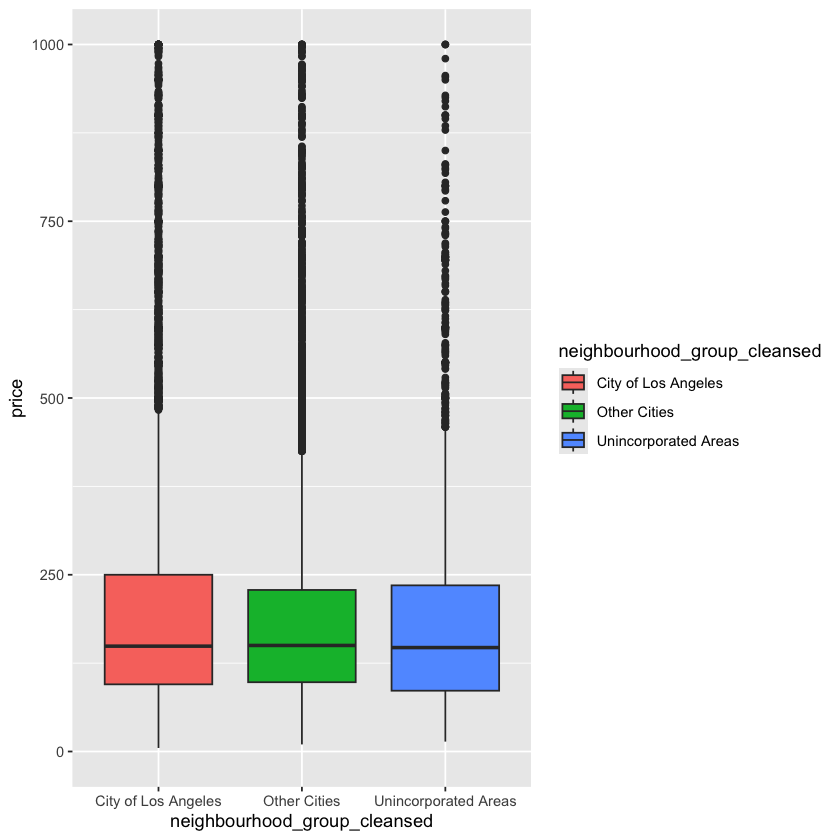

In [ ]:
neighborhood_boxplot <- data %>%
    ggplot(aes(x=neighbourhood_group_cleansed,y = price, fill=neighbourhood_group_cleansed)) +
    geom_boxplot() +
    ylim(c(0, 1000)) +
    xlab("neighborhood") +
    ylab("price")
neighborhood_boxplot